# Data Mining - Lab3
## Evaluation
## Outlines
### True positive (TP), False Negative (FN) 
### Type 1 (False positive or Falsely Predicting Positive) and type 2 (False Negative Errors or Falsely Predicting Negative)
### Confusion Matrix
### ROC curve

## What are TP and TN?
A true positive is an outcome where the model correctly predicts the positive class. Similarly, a true negative is an outcome where the model correctly predicts the negative class

In machine learnig we can predict class directly or it is more flexible to predict the probability of each instance toward each class

![Image](PositiveNegativeClassification.png)

## What are type 1 and type 2 errors?
Type I Error: When one rejects the Null Hypothesis (H0 – Default state of being) given that H0 is true, one commits a Type I error. It can also be termed as false positive. Type II Error: When one fails to reject the Null hypothesis when it is actually false or does not hold good, one commits a Type II error.

In [72]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

### Confusion Matrix

A Confusion matrix is an $N \times N$ matrix used for evaluating the performance of a classification model, where $N$ is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

 |Predicted |  |  |
| --- | --- | --- |
| Actual | TP | FN |
| Actual | FP | TN|


In [73]:
import numpy as np
y_hat = np.asarray([0,1,1,0,1,0,0])
print('pred labels:\t\t', y_hat)
 
# These are the true labels.
y_actual = np.asarray([0,0,1,0,0,1,0])
print(perf_measure(y_actual,y_hat))

pred labels:		 [0 1 1 0 1 0 0]
(1, 2, 3, 1)


In [74]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
breastCancer = load_breast_cancer()
X = breastCancer.data
print("X.shape = ", X.shape)
y = breastCancer.target
# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)
D3 = DecisionTreeClassifier(max_depth=14)
# train the model
D3.fit(X_train, y_train)

X.shape =  (569, 30)


DecisionTreeClassifier(max_depth=14)

In [75]:
y_pred = D3.predict(X_test)

y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1])

In [76]:
from sklearn.metrics import confusion_matrix

# print(perf_measure(y_test,y_pred))

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

[[ 75   5]
 [ 10 138]]


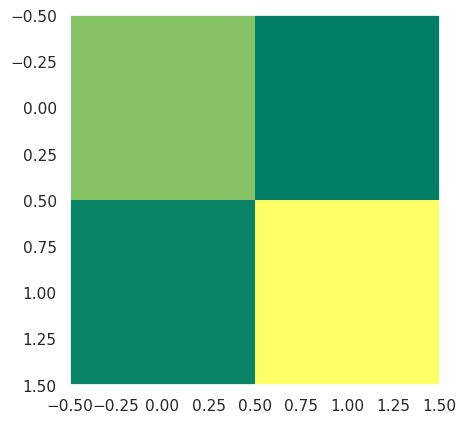

In [77]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.imshow( cf_matrix , cmap = 'summer' , interpolation = 'nearest' )

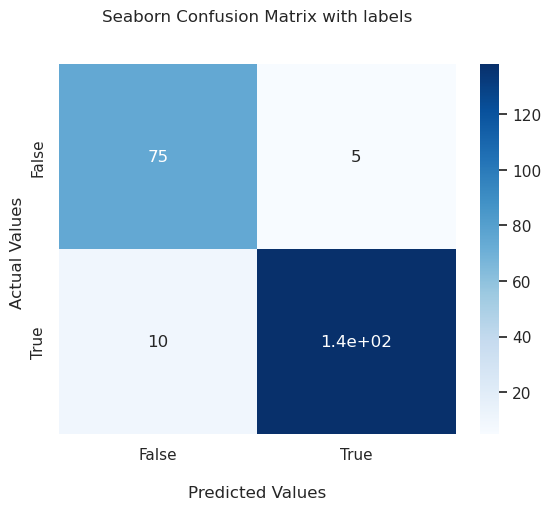

In [78]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [79]:
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [80]:
digits = datasets.load_digits()

# _, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
# for ax, image, label in zip(axes, digits.images, digits.target):
#     ax.set_axis_off()
#     ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
#     ax.set_title("Training: %i" % label)


In [81]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
print(data.shape)

# Create a classifier: a support vector classifier
D3 = DecisionTreeClassifier(max_depth=24)
# train the model

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Learn the digits on the train subset
D3.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = D3.predict(X_test)

(1797, 64)


In [82]:
print(
    f"Classification report for classifier {D3}:\n"
    f"{confusion_matrix(y_test, predicted)}\n"
)

Classification report for classifier DecisionTreeClassifier(max_depth=24):
[[81  0  0  0  1  2  2  0  0  2]
 [ 0 49  5  7  8  1  1  1 11  8]
 [ 1  4 63  9  1  1  2  0  4  1]
 [ 0  2  2 65  0  3  0  3 10  6]
 [ 6  2  0  0 72  6  3  1  1  1]
 [ 0  4  1  0  0 67  1  0  1 17]
 [ 1  1  0  0  6  1 80  0  2  0]
 [ 0  0  0  3  1  8  0 71  5  1]
 [ 0  6  3  7  4 10  4  3 49  2]
 [ 0  3  0  3  1 14  0  0  4 67]]



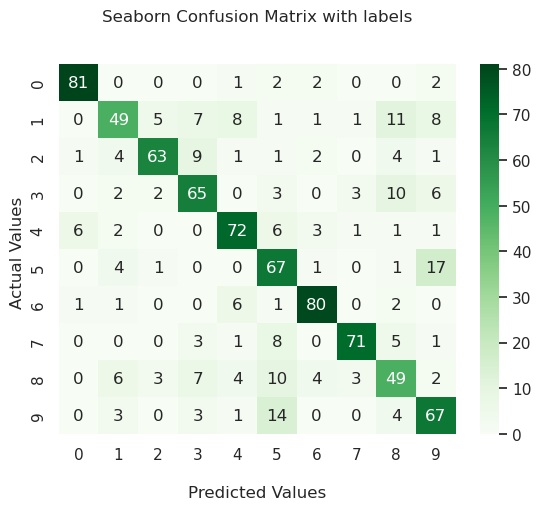

In [83]:
ax = sns.heatmap(confusion_matrix(y_test, predicted), annot=True, cmap='Greens')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


plt.show()

## ROC and Precision Recall curves
It can be more flexible to predict probabilities of an observation belonging to each class in a classification problem rather than predicting classes directly. 
1. It would enable model to trade-off between false positive and false negative type of errors by using different threshold
2. ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.
3. Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.
4. ROC curves are appropriate when the observations are balanced between each class, whereas precision-recall curves are appropriate for imbalanced datasets.
## Let's introduce some important metrics first:
#### Sensitivity / True Positive Rate / Recall
$$Sensitivity = \frac{TP}{TP + FN}$$ 
#### False Negative Rate
$$FNR = \frac{FN}{TP + FN} $$

#### Specificity / True Negative Rate
$$Specificity = \frac{TN}{TN+FP}$$

#### False Positive Rate
$$FPR = \frac{FP}{TN+FP} = 1 - specificity$$

#### Precision
$$Precision = \frac{TP}{TP + FP}$$
## Predicting Probabilities

## ROC Curve
It is a plot of the false positive rate (x-axis) versus the true positive rate (y-axis) for a number of different candidate threshold values between 0.0 and 1.0. Put another way

## ROC Curve from Scratch

In [95]:
def true_false_positive(threshold_vector, y_test):
    true_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 1)
    true_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 0)
    false_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 0)
    false_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 1)

    tpr = true_positive.sum() / (true_positive.sum() + false_negative.sum())
    fpr = false_positive.sum() / (false_positive.sum() + true_negative.sum())

    return tpr, fpr

In [102]:
def roc_from_scratch(probabilities, y_test, partitions=100):
    roc = np.array([])
    for i in range(partitions + 1):        
        threshold_vector = np.greater_equal(probabilities, i / partitions).astype(int)
        tpr, fpr = true_false_positive(threshold_vector, y_test)
        roc = np.append(roc, [fpr, tpr])
        
        #print("threshold = {}".format(i / partitions))
        #print("fpr = {}, tpr = {}".format(fpr, tpr))
        
    return roc.reshape(-1, 2)

In [103]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=1000, n_informative=10, n_features=20, flip_y=0.2)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

model = RandomForestClassifier()
model.fit(X_train, y_train)

prob_vector = model.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'True Positive Rate')

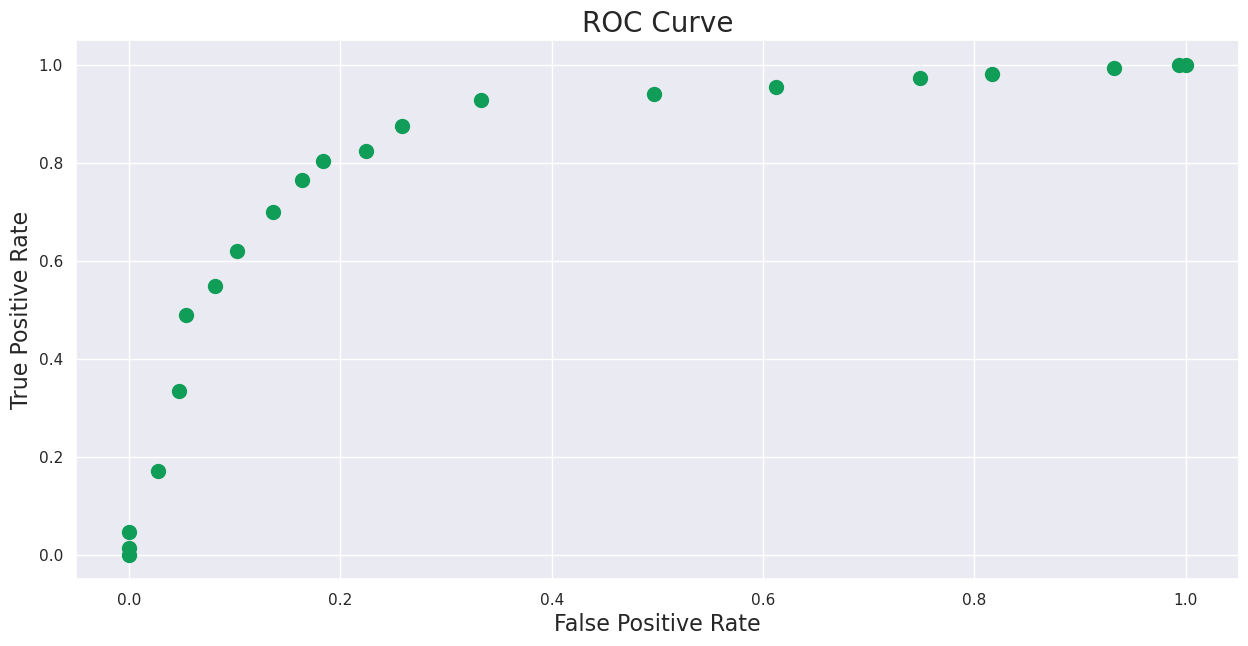

In [104]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
plt.figure(figsize=(15,7))

ROC = roc_from_scratch(prob_vector,y_test,partitions=20)
plt.scatter(ROC[:,0],ROC[:,1],color='#0F9D58',s=100)
plt.title('ROC Curve',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=16)
plt.ylabel('True Positive Rate',fontsize=16)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.780


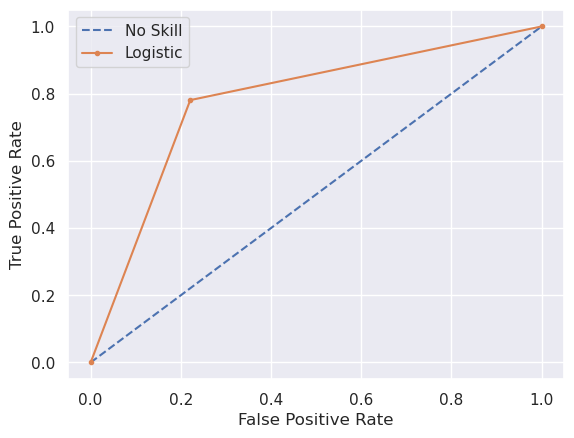

In [114]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = DecisionTreeClassifier()
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
#print("lr_probs = {}".format(lr_probs))
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, thresholds = roc_curve(testy, ns_probs, drop_intermediate=False)
# print("testy = {}".format(testy))
# print("ns_probs = {}".format(ns_probs))
# print("ns_fpr = {}".format(ns_fpr))
# print("ns_tpr = {}".format(ns_tpr))
# print("thresholds = {}".format(thresholds))

lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs, drop_intermediate=False)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### How to interpret ROC curve
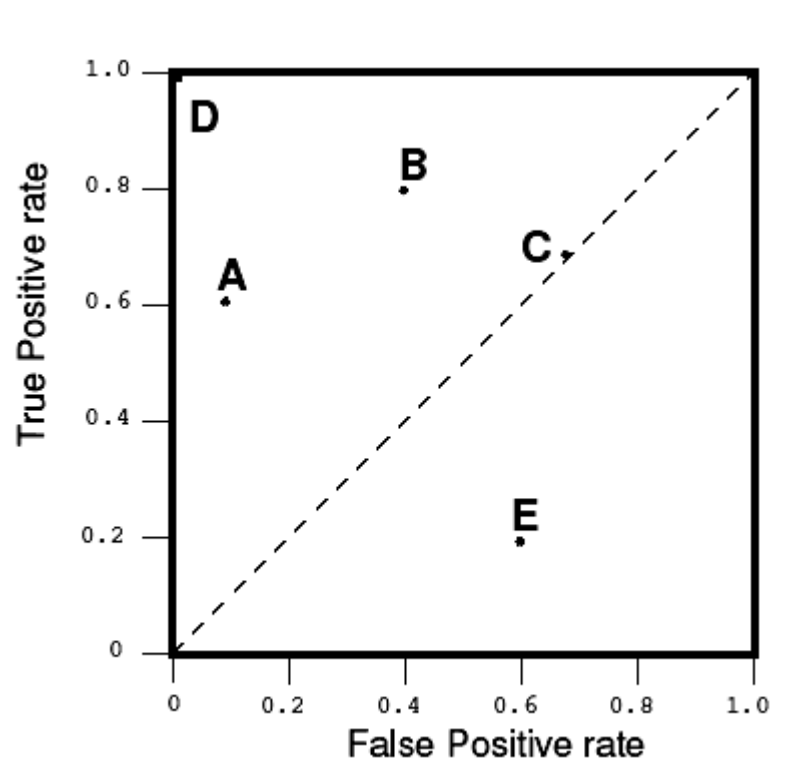

### Which of the five points A, B, C, D, E indicate a perfect classifier?
### Which point(s) indicate a random classifier?
### Which point(s) indicate a bad classifier?